In [12]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

day = -1
file_name = f"./round_2_data/prices_round_2_day_{day}.csv"
df0 = pd.read_csv(file_name, sep=';')

day = 0
file_name = f"./round_2_data/prices_round_2_day_{day}.csv"
df1 = pd.read_csv(file_name, sep=';')

day = 1
file_name = f"./round_2_data/prices_round_2_day_{day}.csv"
df2 = pd.read_csv(file_name, sep=';')


In [13]:
df = pd.concat([df0, df1, df2])

In [4]:
fig = go.Figure()
df_gift_basket = df[df['product'] == 'PICNIC_BASKET1'].copy()
df_gift_basket['swmid'] = (df_gift_basket['bid_price_1'] * df_gift_basket['ask_volume_1'] + df_gift_basket['ask_price_1'] * df_gift_basket['bid_volume_1']) / (df_gift_basket['ask_volume_1'] + df_gift_basket['bid_volume_1'])
fig.add_trace(go.Scatter(x=df.index, y=df_gift_basket['swmid'], mode='lines', name='Gift Basket Price', line=dict(color='blue')))
fig.update_layout(title_text="Gift Basket Price")
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="Price")
fig.show()



In [14]:
fig = go.Figure()
df_gift_basket = df[df['product'] == 'PICNIC_BASKET2'].copy()
df_gift_basket['swmid'] = (df_gift_basket['bid_price_1'] * df_gift_basket['ask_volume_1'] + df_gift_basket['ask_price_1'] * df_gift_basket['bid_volume_1']) / (df_gift_basket['ask_volume_1'] + df_gift_basket['bid_volume_1'])
fig.add_trace(go.Scatter(x=df.index, y=df_gift_basket['swmid'], mode='lines', name='Gift Basket Price', line=dict(color='red')))
fig.update_layout(title_text="Gift Basket Price")
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="Price")
fig.show()


In [2]:
import pandas as pd
day = -1
file_name = f"./round_2_data/prices_round_2_day_{day}.csv"
df2 = pd.read_csv(file_name, sep=';')
df = df2

In [69]:
from lib import parse_log_file
import numpy as np
import json
import pandas as pd
df, df_trades, _ = parse_log_file(f"./clean_data_logs/trade_history_day_{day}.log")

In [14]:
df_chocolate = df[df['product'] == 'CROISSANTS'].copy()
df_strawberries = df[df['product'] == 'JAMS'].copy()
df_roses = df[df['product'] == 'DJEMBES'].copy()
df_gift_basket = df[df['product'] == 'PICNIC_BASKET1'].copy()
df_chocolate['swmid'] = (df_chocolate['bid_price_1'] * df_chocolate['ask_volume_1'] + df_chocolate['ask_price_1'] * df_chocolate['bid_volume_1']) / (df_chocolate['ask_volume_1'] + df_chocolate['bid_volume_1'])
df_strawberries['swmid'] = (df_strawberries['bid_price_1'] * df_strawberries['ask_volume_1'] + df_strawberries['ask_price_1'] * df_strawberries['bid_volume_1']) / (df_strawberries['ask_volume_1'] + df_strawberries['bid_volume_1'])
df_roses['swmid'] = (df_roses['bid_price_1'] * df_roses['ask_volume_1'] + df_roses['ask_price_1'] * df_roses['bid_volume_1']) / (df_roses['ask_volume_1'] + df_roses['bid_volume_1'])
df_gift_basket['swmid'] = (df_gift_basket['bid_price_1'] * df_gift_basket['ask_volume_1'] + df_gift_basket['ask_price_1'] * df_gift_basket['bid_volume_1']) / (df_gift_basket['ask_volume_1'] + df_gift_basket['bid_volume_1'])
df_synthetic = pd.DataFrame({
    'timestamp': df_chocolate['timestamp'].to_numpy(),
    'bid_price_1': df_chocolate['bid_price_1'].to_numpy() * 6 + df_strawberries['bid_price_1'].to_numpy() * 3 + df_roses['bid_price_1'].to_numpy(),
    'bid_volume_1': np.min(np.array([df_chocolate['bid_volume_1'].to_numpy(), df_strawberries['bid_volume_1'].to_numpy(), df_roses['bid_volume_1'].to_numpy()]), axis=0),
    'ask_price_1': df_chocolate['ask_price_1'].to_numpy() * 6 + df_strawberries['ask_price_1'].to_numpy() * 3 + df_roses['ask_price_1'].to_numpy(),
    'ask_volume_1': np.min(np.array([df_chocolate['ask_volume_1'].to_numpy(), df_strawberries['ask_volume_1'].to_numpy(), df_roses['ask_volume_1'].to_numpy()]), axis=0),
    'mid_price':  df_chocolate['mid_price'].to_numpy() * 6 + df_strawberries['mid_price'].to_numpy() * 3 + df_roses['mid_price'].to_numpy(),
    'swmid': df_chocolate['swmid'].to_numpy() * 6 + df_strawberries['swmid'].to_numpy() * 3 + df_roses['swmid'].to_numpy()
    })


In [15]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
# fig.add_trace(go.Scatter(x=df_synthetic['timestamp'], y=df_synthetic['swmid'] + 370, mode='lines', name='Synthetic SWMID', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_gift_basket['timestamp'], y=df_gift_basket['swmid'], mode='lines', name='Gift Basket SWMID', line=dict(color='blue')), secondary_y=False)
fig.add_trace(go.Scatter(x=df_synthetic['timestamp'], y=df_synthetic['swmid'], mode='lines', name='Synthetic SWMID', line=dict(color='red')), secondary_y=True)
fig.update_layout(title_text="Synthetic and Gift Basket SWMID")
fig.update_xaxes(title_text="Timestamp")
fig.update_yaxes(title_text="SWMID", secondary_y=False)
fig.update_yaxes(title_text="Synthetic SWMID", secondary_y=True)
fig.show()




In [8]:
df_gift_basket

day  timestamp         product  bid_price_1  bid_volume_1  bid_price_2  \
6        0          0  PICNIC_BASKET1        59223            19      59222.0   
10       0        100  PICNIC_BASKET1        59223            13      59222.0   
17       0        200  PICNIC_BASKET1        59232             4      59227.0   
25       0        300  PICNIC_BASKET1        59224             2      59223.0   
38       0        400  PICNIC_BASKET1        59226             2      59225.0   
...    ...        ...             ...          ...           ...          ...   
79962    0     999500  PICNIC_BASKET1        58712            12      58711.0   
79971    0     999600  PICNIC_BASKET1        58718             2      58717.0   
79982    0     999700  PICNIC_BASKET1        58718             2      58717.0   
79985    0     999800  PICNIC_BASKET1        58710            19      58709.0   
79994    0     999900  PICNIC_BASKET1        58716             2      58715.0   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
6              24.0          NaN           NaN        59234            19   
10             20.0          NaN           NaN        59233             1   
17              1.0      59226.0          35.0        59237             1   
25             11.0      59222.0          29.0        59233             2   
38             13.0      59224.0          25.0        59235             2   
...             ...          ...           ...          ...           ...   
79962          19.0          NaN           NaN        58723            12   
79971          11.0      58716.0          19.0        58722             8   
79982          11.0      58716.0          23.0        58727             2   
79985          21.0          NaN           NaN        58721            40   
79994          34.0          NaN           NaN        58726            18   

       ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
6          59235.0          24.0          NaN           NaN    59228.5   
10         59234.0          32.0          NaN           NaN    59228.0   
17         59238.0          35.0          NaN           NaN    59234.5   
25         59234.0          11.0      59235.0          29.0    59228.5   
38         59236.0          13.0      59237.0          25.0    59230.5   
...            ...           ...          ...           ...        ...   
79962      58724.0          19.0          NaN           NaN    58717.5   
79971      58727.0           2.0      58728.0          11.0    58720.0   
79982      58728.0          11.0      58729.0          23.0    58722.5   
79985          NaN           NaN          NaN           NaN    58715.5   
79994      58727.0          18.0          NaN           NaN    58721.0   

       profit_and_loss         swmid  
6                  0.0  59228.500000  
10                 0.0  59232.285714  
17                 0.0  59236.000000  
25                 0.0  59228.500000  
38                 0.0  59230.500000  
...                ...           ...  
79962              0.0  58717.500000  
79971              0.0  58718.800000  
79982              0.0  58722.500000  
79985              0.0  58713.542373  
79994              0.0  58717.000000  

[10000 rows x 18 columns]

In [25]:
spread = pd.DataFrame({'timestamp': df_synthetic['timestamp'], 'spread': df_gift_basket['swmid'].to_numpy() - df_synthetic['swmid'].to_numpy()})
spread_mean = spread['spread'].mean()
print(spread_mean)

32.35709931373675


In [6]:
default_spread_mean = (40+70+32)/3
print(default_spread_mean)

47.333333333333336


In [11]:
spread['std30'] = spread['spread'].rolling(window=200).apply(lambda x: np.sqrt(np.mean((x-default_spread_mean)**2)))
print(spread['std30'].mean())

68.82403231933446


In [19]:

fig = go.Figure()
spread = pd.DataFrame({'timestamp': df_synthetic['timestamp'], 'spread': df_gift_basket['swmid'].to_numpy() - df_synthetic['swmid'].to_numpy()})

# fig.add_trace(go.Scatter(x=df_synthetic['timestamp'], y=spread, mode='lines', name='Difference', line=dict(color='red')))

spread['std30'] = spread['spread'].rolling(window=200).std()
# spread['std30'] = spread['spread'].rolling(window=100).apply(lambda x: np.sqrt(np.mean((x-376)**2)))



fig.add_trace(go.Scatter(x=spread.index, y=spread['spread'], mode='lines', name='Spread', line=dict(color='blue')))
# fig.add_trace(go.Scatter(x=spread.index, y=spread['sma5'], mode='lines', name='SMA5', line=dict(color='green')))
# fig.add_trace(go.Scatter(x=spread.index, y=spread['sma60'], mode='lines', name='SMA60', line=dict(color='red')))
spread['z_score'] = (spread['spread'] - default_spread_mean) / spread['std30']
fig.add_shape(
    type="line",
    x0=spread.index[0],
    y0=10,
    x1=spread.index[-1],
    y1=10,
    line=dict(
        color="LightSeaGreen",
        width=2,
        dash="dashdot",
    ),
    yref="y2"
)

fig.add_shape(
    type="line",
    x0=spread.index[0],
    y0=-10,
    x1=spread.index[-1],
    y1=-10,
    line=dict(
        color="LightSeaGreen",
        width=2,
        dash="dashdot",
    ),
    yref="y2"
)


fig.add_trace(go.Scatter(x=spread.index, y=spread['z_score'], mode='lines', name='Z Score', line=dict(color='purple'), yaxis='y2'))
fig.update_layout(yaxis2=dict(title='Z Score', overlaying='y', side='right'))
fig.update_layout(title_text="Spread and Moving Averages")
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="Value")


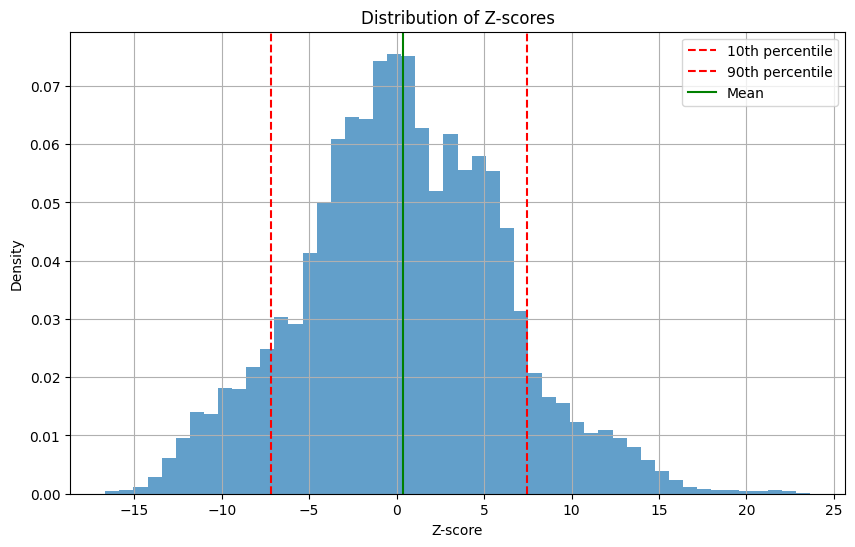

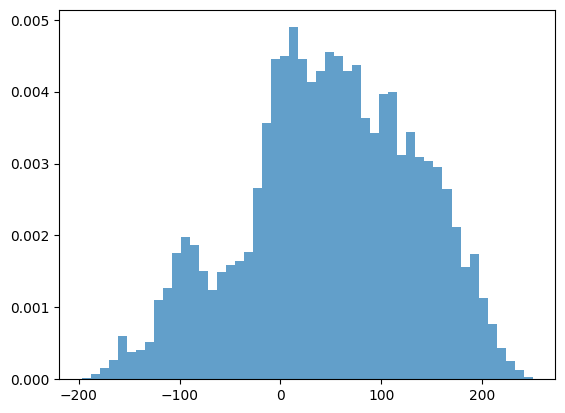

Percentage between 10th and 90th percentiles: 79.47%
10th percentile: -7.19
90th percentile: 7.44
Mean z-score: 0.38
Standard deviation of z-scores: 5.84
Skewness: 0.13
Kurtosis: 0.12


In [22]:
import pandas as pd
import numpy as np
from typing import Union, List
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from scipy import stats

def analyze_zscore_distribution(df: pd.DataFrame) -> dict:
    """
    Analyze the distribution of z-scores and calculate what percentage falls between 10th and 90th percentiles
    """
    
    # Calculate percentiles
    p10 = df['z_score'].quantile(0.1)
    p90 = df['z_score'].quantile(0.9)
    
    # Calculate percentage between percentiles
    between_percentiles = df[(df['z_score'] >= p10) & (df['z_score'] <= p90)]
    percentage_between = (len(between_percentiles) / len(df)) * 100
    
    # Calculate additional statistics
    mean_z = df['z_score'].mean()
    std_z = df['z_score'].std()
    skewness = df['z_score'].skew()
    kurtosis = df['z_score'].kurtosis()
    
    # Plot distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['z_score'], bins=50, density=True, alpha=0.7)
    plt.axvline(x=p10, color='red', linestyle='--', label='10th percentile')
    plt.axvline(x=p90, color='red', linestyle='--', label='90th percentile')
    plt.axvline(x=mean_z, color='green', linestyle='-', label='Mean')
    plt.title('Distribution of Z-scores')
    plt.xlabel('Z-score')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.hist(df['spread'], bins=50, density=True, alpha=0.7)
    plt.show()
    
    return {
        'percentage_between_10_90': percentage_between,
        '10th_percentile': p10,
        '90th_percentile': p90,
        'mean_z': mean_z,
        'std_z': std_z,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'total_observations': len(df)
    }

results = analyze_zscore_distribution(spread)
print(f"Percentage between 10th and 90th percentiles: {results['percentage_between_10_90']:.2f}%")
print(f"10th percentile: {results['10th_percentile']:.2f}")
print(f"90th percentile: {results['90th_percentile']:.2f}")
print(f"Mean z-score: {results['mean_z']:.2f}")
print(f"Standard deviation of z-scores: {results['std_z']:.2f}")
print(f"Skewness: {results['skewness']:.2f}")
print(f"Kurtosis: {results['kurtosis']:.2f}")

In [ ]:
# three means, 
# when mean is in range of band, calculate z-score using spread - band_center / rolling std
# trade on that? 
# what do we do when sma enters another band? clear position? 

In [23]:
from tqdm import tqdm
spread['std30'] = spread['spread'].rolling(window=30).std()
z_score = (spread['spread'].to_numpy() - 376) / spread['std30'].to_numpy()
spread_market = pd.DataFrame({'timestamp': df_synthetic['timestamp'].to_numpy(), 'swmid': df_gift_basket['swmid'].to_numpy() - df_synthetic['swmid'].to_numpy()})

def cross_spread(cash, quantity):
    return cash - abs(quantity) * 10

def backtest(thresh, target_position, std_window, verbose=False):
    cash = 0
    position = 0
    pnl_hist = []
    position_hist = []
    cash_hist = []
    spread[f'std{std_window}'] = spread['spread'].rolling(window=std_window).std()
    z_score = (spread['spread'].to_numpy() - 376) / spread[f'std{std_window}'].to_numpy()
    spread_market['spread_z'] = z_score
    for index, row in spread_market.iterrows():
        if index == 0:
            continue
        swmid = row['swmid']
        
        if row['spread_z'] > thresh and position != -target_position:
        
            
            quantity = -target_position - position
            cash -= (-target_position - position) * swmid
            cash = cross_spread(cash, quantity)
            position = -target_position
            
            if verbose:
                print(f"SELL {quantity} AT PRICE {swmid} AT TIME {row['timestamp']}")
        
        if row['spread_z'] < -thresh and position != target_position:
            quantity = target_position - position
            cash -= (target_position - position) * swmid
            cash = cross_spread(cash, quantity)
            position = target_position
            
            if verbose:
                print(f"BUY {quantity} FOR PRICE {swmid} AT TIME {row['timestamp']}")
    
        position_hist.append(position)
        cash_hist.append(cash)
        pnl_hist.append(cash + position * swmid)
        
    if verbose:
        print(f"PNL: {pnl_hist[-1]}")
        
    return pnl_hist

In [26]:
position_opt = [60]
thresh_opt = [1,2,3,5,6,7,7.5,8,9,10,15,20,25]
std_window_opt = [10,20,25,30,35,40,50]
opt = []
for thresh in tqdm(thresh_opt): 
    for std_window in std_window_opt: 
        for position in position_opt:
            pnl = backtest(thresh, position, std_window)
            opt.append({"thresh": thresh, "position": position, "std_window": std_window, "pnl": pnl})
            print("="*80)
            print(f"Thresh: {thresh}, Position: {position}, Std Window: {std_window}, PnL: {pnl[-1]}")
            print("="*80)

  0%|          | 0/13 [00:00<?, ?it/s]

Thresh: 1, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 1, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 1, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 1, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 1, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 1, Position: 60, Std Window: 40, PnL: 16425.0


  8%|▊         | 1/13 [00:07<01:27,  7.30s/it]

Thresh: 1, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 2, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 2, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 2, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 2, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 2, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 2, Position: 60, Std Window: 40, PnL: 16425.0


 15%|█▌        | 2/13 [00:15<01:23,  7.57s/it]

Thresh: 2, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 3, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 3, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 3, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 3, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 3, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 3, Position: 60, Std Window: 40, PnL: 16425.0


 23%|██▎       | 3/13 [00:22<01:16,  7.67s/it]

Thresh: 3, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 5, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 5, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 5, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 5, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 5, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 5, Position: 60, Std Window: 40, PnL: 16425.0


 31%|███       | 4/13 [00:30<01:08,  7.61s/it]

Thresh: 5, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 6, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 6, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 6, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 6, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 6, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 6, Position: 60, Std Window: 40, PnL: 16425.0


 38%|███▊      | 5/13 [00:37<00:59,  7.49s/it]

Thresh: 6, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 7, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 7, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 7, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 7, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 7, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 7, Position: 60, Std Window: 40, PnL: 16425.0


 46%|████▌     | 6/13 [00:44<00:50,  7.23s/it]

Thresh: 7, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 7.5, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 7.5, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 7.5, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 7.5, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 7.5, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 7.5, Position: 60, Std Window: 40, PnL: 16425.0


 54%|█████▍    | 7/13 [00:52<00:45,  7.53s/it]

Thresh: 7.5, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 8, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 8, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 8, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 8, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 8, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 8, Position: 60, Std Window: 40, PnL: 16425.0


 62%|██████▏   | 8/13 [01:00<00:38,  7.65s/it]

Thresh: 8, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 9, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 9, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 9, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 9, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 9, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 9, Position: 60, Std Window: 40, PnL: 16425.0


 69%|██████▉   | 9/13 [01:06<00:29,  7.26s/it]

Thresh: 9, Position: 60, Std Window: 50, PnL: 16804.347826086683
Thresh: 10, Position: 60, Std Window: 10, PnL: 16400.909090908826
Thresh: 10, Position: 60, Std Window: 20, PnL: 16343.076923076995
Thresh: 10, Position: 60, Std Window: 25, PnL: 16334.000000000233
Thresh: 10, Position: 60, Std Window: 30, PnL: 16411.413547360804
Thresh: 10, Position: 60, Std Window: 35, PnL: 16629.936507936334
Thresh: 10, Position: 60, Std Window: 40, PnL: 16425.0


 77%|███████▋  | 10/13 [01:13<00:20,  6.96s/it]

Thresh: 10, Position: 60, Std Window: 50, PnL: 16804.347826086683


In [27]:
import pickle
import json

with open('optimize_naive/optimize0.json', 'w') as f:
    json.dump(opt, f, default=str)

In [28]:
spread_market = pd.DataFrame({'timestamp': df_synthetic['timestamp'].to_numpy(), 'spread_z': z_score, 'swmid': df_gift_basket['swmid'].to_numpy() - df_synthetic['swmid'].to_numpy()})

In [29]:
opt.sort(key=lambda x: x['pnl'][-1], reverse=True)
top_3_pnl = opt[:3]
pnl_graph = top_3_pnl[0]['pnl']

fig = go.Figure()
fig.add_trace(go.Scatter(x=spread_market.index, y=pnl_graph, mode='lines', name='PnL'))
fig.show()


In [39]:
top_3_pnl = opt[:3]
top_pnl_params = top_3_pnl[0]
for params in top_3_pnl:
    print(f"thresh: {params['thresh']}, std_window: {params['std_window']}, pnl: {params['pnl'][-1]}")

thresh: 7.5, std_window: 40, pnl: 86402.16896102065
thresh: 15, std_window: 10, pnl: 83993.87007735204
thresh: 25, std_window: 10, pnl: 82265.77298318676


In [76]:
res = backtest(top_pnl_params['thresh'], top_pnl_params['position'], top_pnl_params['std_window'], verbose = True)

SELL -60 AT PRICE 432.58955223880184 AT TIME 15000.0
BUY 120 FOR PRICE 294.91428571428696 AT TIME 236900.0
SELL -120 AT PRICE 516.7982456140307 AT TIME 498800.0
BUY 120 FOR PRICE 285.5 AT TIME 704300.0
SELL -120 AT PRICE 431.2864321608067 AT TIME 789400.0
BUY 120 FOR PRICE 288.6292134831456 AT TIME 805700.0
SELL -120 AT PRICE 485.400456460673 AT TIME 911100.0
BUY 120 FOR PRICE 317.5 AT TIME 935900.0
SELL -120 AT PRICE 468.1387665198272 AT TIME 991000.0
PNL: 75397.73750752938


# backtest with clearing

In [ ]:
from tqdm import tqdm
spread['std30'] = spread['spread'].rolling(window=30).std()
z_score = (spread['spread'].to_numpy() - 376) / spread['std30'].to_numpy()
spread_market = pd.DataFrame({'timestamp': df_synthetic['timestamp'].to_numpy(), 'swmid': df_gift_basket['swmid'].to_numpy() - df_synthetic['swmid'].to_numpy()})

def cross_spread(cash, quantity):
    return cash - abs(quantity) * 10

def backtest(take_thresh,clear_thresh, target_position, std_window, verbose=False):
    cash = 0
    position = 0
    pnl_hist = []
    position_hist = []
    cash_hist = []
    spread[f'std{std_window}'] = spread['spread'].rolling(window=std_window).std()
    z_score = (spread['spread'].to_numpy() - 376) / spread[f'std{std_window}'].to_numpy()
    spread_market['spread_z'] = z_score
    for index, row in spread_market.iterrows():
        if index == 0:
            continue
        swmid = row['swmid']
        
        if row['spread_z'] > take_thresh and position != -target_position:
            quantity = -target_position - position
            cash -= (-target_position - position) * swmid
            cash = cross_spread(cash, quantity)
            position = -target_position
            
            if verbose:
                print(f"SELL {quantity} AT PRICE {swmid} AT TIME {row['timestamp']}")
        
        if row['spread_z'] < -take_thresh and position != target_position:
            quantity = target_position - position
            cash -= (target_position - position) * swmid
            cash = cross_spread(cash, quantity)
            position = target_position
            
            if verbose:
                print(f"BUY {quantity} FOR PRICE {swmid} AT TIME {row['timestamp']}")
            
        if (row['spread_z'] < clear_thresh and row['spread_z'] > -clear_thresh) and position != 0:
            quantity = -position
            cash -= (quantity * swmid)
            cash = cross_spread(cash, quantity)
            position = 0
            
            if verbose:
                print(f"CLEAR {quantity} FOR PRICE {swmid} AT TIME {row['timestamp']}")
    
        position_hist.append(position)
        cash_hist.append(cash)
        pnl_hist.append(cash + position * swmid)
    if verbose:
        print(f"PNL: {pnl_hist[-1]}")
    return pnl_hist

In [63]:
position_opt = [60]
thresh_opt = [1,2,3,5,7.5,10,15,20,25,30,35, 40, 45]
clear_thresh_opt = [0,0.5,1,2,3,5,6,7,7.5,8,9,10,15,20,25]
std_window_opt = [10,20,25,30,35,40,50]
opt_clear = []
for thresh in tqdm(thresh_opt): 
    for clear_thresh in [t for t in clear_thresh_opt if t <= thresh]:
        for std_window in std_window_opt: 
            for position in position_opt:
                pnl = backtest(thresh, clear_thresh, position, std_window)
                opt_clear.append({"thresh": thresh, "clear_thresh": clear_thresh, "position": position, "std_window": std_window, "pnl": pnl})

100%|███████████████████████████████████████████████████████| 13/13 [03:20<00:00, 15.42s/it]


In [46]:
opt_clear.sort(key=lambda x: x['pnl'][-1], reverse=True)
top_3_pnl = opt_clear[:3]
pnl_graph = top_3_pnl[0]['pnl']

fig = go.Figure()
fig.add_trace(go.Scatter(x=spread_market.index, y=pnl_graph, mode='lines', name='PnL'))
fig.show()


In [54]:
top_pnl_params = top_3_pnl[0]

In [60]:
pnl_params = [{k: v for k, v in d.items() if k != "pnl"} for d in opt_clear]

In [59]:
res = backtest(top_pnl_params['thresh'], top_pnl_params['clear_thresh'], top_pnl_params['position'], top_pnl_params['std_window'], verbose = True)

SELL -60 AT PRICE 430.0 AT TIME 67000.0
BUY 120 FOR PRICE 299.9405940594006 AT TIME 87500.0
SELL -120 AT PRICE 494.5395653385349 AT TIME 244200.0
BUY 120 FOR PRICE 320.45964125561295 AT TIME 349600.0
SELL -120 AT PRICE 465.30597014926025 AT TIME 402700.0
BUY 120 FOR PRICE 274.4071428571333 AT TIME 442400.0
SELL -120 AT PRICE 447.12751677852066 AT TIME 616900.0
BUY 120 FOR PRICE 328.5510948905139 AT TIME 727900.0
SELL -120 AT PRICE 451.2894736842136 AT TIME 758900.0
BUY 120 FOR PRICE 277.42585551331285 AT TIME 830300.0
SELL -120 AT PRICE 452.0 AT TIME 904900.0


In [61]:
pnl_params

[{'thresh': 7.5, 'clear_thresh': 0, 'position': 60, 'std_window': 40},
 {'thresh': 15, 'clear_thresh': 0, 'position': 60, 'std_window': 10},
 {'thresh': 25, 'clear_thresh': 0, 'position': 60, 'std_window': 10},
 {'thresh': 10, 'clear_thresh': 0, 'position': 60, 'std_window': 25},
 {'thresh': 5, 'clear_thresh': 0, 'position': 60, 'std_window': 25},
 {'thresh': 7.5, 'clear_thresh': 0, 'position': 60, 'std_window': 35},
 {'thresh': 5, 'clear_thresh': 0, 'position': 60, 'std_window': 30},
 {'thresh': 5, 'clear_thresh': 0, 'position': 60, 'std_window': 35},
 {'thresh': 5, 'clear_thresh': 0, 'position': 60, 'std_window': 40},
 {'thresh': 20, 'clear_thresh': 0, 'position': 60, 'std_window': 10},
 {'thresh': 2, 'clear_thresh': 0, 'position': 60, 'std_window': 30},
 {'thresh': 7.5, 'clear_thresh': 0, 'position': 60, 'std_window': 10},
 {'thresh': 5, 'clear_thresh': 0, 'position': 60, 'std_window': 20},
 {'thresh': 15, 'clear_thresh': 0, 'position': 60, 'std_window': 20},
 {'thresh': 10, 'clear_

In [64]:
params = {'thresh': 15, 'clear_thresh': 0.5, 'position': 60, 'std_window': 10}
res = backtest(params['thresh'], params['clear_thresh'], params['position'], params['std_window'], verbose = True)

SELL -60 AT PRICE 453.0 AT TIME 1000.0
CLEAR 60 FOR PRICE 379.2549128661485 AT TIME 7100.0
SELL -60 AT PRICE 419.22631578947767 AT TIME 20900.0
CLEAR 60 FOR PRICE 380.0 AT TIME 25600.0
SELL -60 AT PRICE 427.08056872038287 AT TIME 59900.0
CLEAR 60 FOR PRICE 374.6925267121842 AT TIME 76600.0
BUY 60 FOR PRICE 330.0 AT TIME 84600.0
CLEAR -60 FOR PRICE 369.86899479065323 AT TIME 124300.0
BUY 60 FOR PRICE 317.2333333333372 AT TIME 130900.0
CLEAR -60 FOR PRICE 379.64422741541057 AT TIME 176800.0
BUY 60 FOR PRICE 302.5 AT TIME 195600.0
CLEAR -60 FOR PRICE 377.1973315642099 AT TIME 223400.0
SELL -60 AT PRICE 477.29746835443075 AT TIME 242000.0
CLEAR 60 FOR PRICE 378.3969465648843 AT TIME 330300.0
BUY 60 FOR PRICE 319.9696969696961 AT TIME 358000.0
CLEAR -60 FOR PRICE 375.80303030302457 AT TIME 366400.0
SELL -60 AT PRICE 452.71724137931596 AT TIME 399900.0
CLEAR 60 FOR PRICE 370.72891566265025 AT TIME 430200.0
BUY 60 FOR PRICE 291.75 AT TIME 440600.0
CLEAR -60 FOR PRICE 372.2690247252758 AT TIME

In [66]:

fig = go.Figure()
spread = pd.DataFrame({'timestamp': df_synthetic['timestamp'], 'spread': df_gift_basket['swmid'].to_numpy() - df_synthetic['swmid'].to_numpy()})

# fig.add_trace(go.Scatter(x=df_synthetic['timestamp'], y=spread, mode='lines', name='Difference', line=dict(color='red')))

spread['std30'] = spread['spread'].rolling(window=params['std_window']).std()
# spread['std30'] = spread['spread'].rolling(window=100).apply(lambda x: np.sqrt(np.mean((x-376)**2)))



fig.add_trace(go.Scatter(x=spread.index, y=spread['spread'], mode='lines', name='Spread', line=dict(color='blue')))
# fig.add_trace(go.Scatter(x=spread.index, y=spread['sma5'], mode='lines', name='SMA5', line=dict(color='green')))
# fig.add_trace(go.Scatter(x=spread.index, y=spread['sma60'], mode='lines', name='SMA60', line=dict(color='red')))
spread['z_score'] = (spread['spread'] - 376) / spread['std30']
fig.add_shape(
    type="line",
    x0=spread.index[0],
    y0=params['thresh'],
    x1=spread.index[-1],
    y1=params['thresh'],
    line=dict(
        color="LightSeaGreen",
        width=2,
        dash="dashdot",
    ),
    yref="y2"
)

fig.add_shape(
    type="line",
    x0=spread.index[0],
    y0=-params['thresh'],
    x1=spread.index[-1],
    y1=-params['thresh'],
    line=dict(
        color="LightSeaGreen",
        width=2,
        dash="dashdot",
    ),
    yref="y2"
)


fig.add_shape(
    type="line",
    x0=spread.index[0],
    y0=params['clear_thresh'],
    x1=spread.index[-1],
    y1=params['clear_thresh'],
    line=dict(
        color="LightBlue",
        width=1,
        dash="dashdot",
    ),
    yref="y2"
)

fig.add_shape(
    type="line",
    x0=spread.index[0],
    y0=-params['clear_thresh'],
    x1=spread.index[-1],
    y1=-params['clear_thresh'],
    line=dict(
        color="LightBlue",
        width=1,
        dash="dashdot",
    ),
    yref="y2"
)


fig.add_trace(go.Scatter(x=spread.index, y=spread['z_score'], mode='lines', name='Z Score', line=dict(color='purple'), yaxis='y2'))
fig.update_layout(yaxis2=dict(title='Z Score', overlaying='y', side='right'))
fig.update_layout(title_text="Spread and Moving Averages")
fig.update_xaxes(title_text="Index")
fig.update_yaxes(title_text="Value")
